# US Accidents Exploratory Data Analysis

This is a countrywide US accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to December 2020, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks.

1. Data Sourced from Kaggle. (https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents/data)
3. Used the sample data file which contains (500000)rows because original file is huge in size(2.8gb).


## Download Data

In [1]:
pip install opendatasets --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import opendatasets as od

In [3]:
url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
od.download(url)

Skipping, found downloaded files in ".\us-accidents" (use force=True to force download)


In [4]:
data_file = './us-accidents/US_Accidents_March23.csv'

## Data Preparation & Cleaning

1. Load the file using pandas.
2. Look at high level info about columns.
3. Fix any missing or incorrect values.

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv(r'C:\Users\shubh\OneDrive\Desktop\Python Projects\US_Accidents_March23.csv')

In [7]:
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,False,Night,Night,Night,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,A-6077227,Source1,2,2021-12-15 07:30:00,2021-12-15 07:50:30,45.522510,-123.084104,45.520225,-123.084211,0.158,...,False,False,False,False,False,False,Night,Day,Day,Day
499996,A-6323243,Source1,2,2021-12-19 16:25:00,2021-12-19 17:40:37,26.702570,-80.111169,26.703141,-80.111133,0.040,...,False,False,False,False,False,False,Day,Day,Day,Day
499997,A-3789256,Source1,2,2022-04-13 19:28:29,2022-04-13 21:33:44,34.561862,-112.259620,34.566822,-112.267150,0.549,...,False,False,False,False,True,False,Night,Night,Day,Day
499998,A-7030381,Source1,3,2020-05-15 17:20:56,2020-05-15 17:50:56,38.406680,-78.619310,38.406680,-78.619310,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

In [9]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,500000.000000,500000.000000,500000.000000,279623.000000,279623.000000,500000.000000,489534.000000,370983.000000,488870.000000,491072.000000,488709.000000,463013.000000,357384.000000
mean,2.212748,36.206421,-94.736583,36.273192,-95.776553,0.564317,61.646254,58.229028,64.834921,29.536621,9.091540,7.681347,0.008289
std,0.486661,5.071411,17.405761,5.265333,18.120211,1.774872,19.000133,22.352246,22.826158,1.008666,2.708083,5.431361,0.101865
min,1.000000,24.562117,-124.497420,24.570110,-124.497419,0.000000,-77.800000,-53.200000,1.000000,0.120000,0.000000,0.000000,0.000000
25%,2.000000,33.416823,-117.233047,33.474773,-117.778324,0.000000,49.000000,43.000000,48.000000,29.370000,10.000000,4.600000,0.000000
50%,2.000000,35.832147,-87.794365,36.192669,-88.039013,0.029000,64.000000,62.000000,67.000000,29.860000,10.000000,7.000000,0.000000
75%,2.000000,40.082443,-80.359601,40.181341,-80.252449,0.465000,76.000000,75.000000,84.000000,30.030000,10.000000,10.400000,0.000000
max,4.000000,48.999569,-67.484130,48.998901,-67.484130,193.479996,207.000000,207.000000,100.000000,38.440000,130.000000,822.800000,10.130000


In [10]:
# numeric columns in data

numeric = ['int16','int32','int64','float16','float32','float64']

numeric_df = df.select_dtypes(include =numeric)
len(numeric_df.columns)

13

In [11]:
# Percentage of data contains null.

null_percentage = df.isnull().sum().sort_values(ascending = False) / len(df)
null_percentage

End_Lat                  0.440754
End_Lng                  0.440754
Precipitation(in)        0.285232
Wind_Chill(F)            0.258034
Wind_Speed(mph)          0.073974
Visibility(mi)           0.022582
Wind_Direction           0.022394
Humidity(%)              0.022260
Weather_Condition        0.022202
Temperature(F)           0.020932
Pressure(in)             0.017856
Weather_Timestamp        0.015348
Nautical_Twilight        0.002966
Civil_Twilight           0.002966
Sunrise_Sunset           0.002966
Astronomical_Twilight    0.002966
Airport_Code             0.002892
Street                   0.001382
Timezone                 0.001014
Zipcode                  0.000232
City                     0.000038
Description              0.000002
Traffic_Signal           0.000000
Roundabout               0.000000
Station                  0.000000
Stop                     0.000000
Traffic_Calming          0.000000
Country                  0.000000
Turning_Loop             0.000000
No_Exit       

<AxesSubplot:>

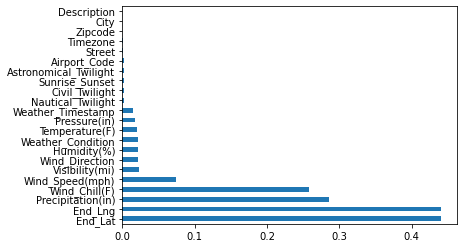

In [12]:
# percentage of missing values per column.

null_percentage[null_percentage != 0].plot(kind ='barh')

In [13]:
# dropped null columns.
null_percentage[null_percentage >= 0.2]

main_df = df.drop(['End_Lat','End_Lng','Precipitation(in)','Wind_Chill(F)'],axis = 1)
main_df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,0.000,Accident on LA-19 Baker-Zachary Hwy at Lower Z...,Highway 19,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,0.056,Incident on FOREST RIDGE DR near PEPPERIDGE PL...,Forest Ridge Dr,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,0.022,Accident on W Central Ave from Floradale Ave t...,Floradale Ave,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,1.054,Incident on I-90 EB near REST AREA Drive with ...,14th St NW,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,0.046,RP ADV THEY LOCATED SUSP VEH OF 20002 - 726 CR...,River Blvd,...,False,False,False,False,False,False,Night,Night,Night,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,A-6077227,Source1,2,2021-12-15 07:30:00,2021-12-15 07:50:30,45.522510,-123.084104,0.158,Stationary traffic on OR-47 from NW Martin Rd ...,Quince St,...,False,False,False,False,False,False,Night,Day,Day,Day
499996,A-6323243,Source1,2,2021-12-19 16:25:00,2021-12-19 17:40:37,26.702570,-80.111169,0.040,Incident on MILITARY TRL near WESTGATE AVE Dri...,N Military Trl,...,False,False,False,False,False,False,Day,Day,Day,Day
499997,A-3789256,Source1,2,2022-04-13 19:28:29,2022-04-13 21:33:44,34.561862,-112.259620,0.549,Crash on the right shoulder on E SR-69 Northbo...,E AZ-69,...,False,False,False,False,True,False,Night,Night,Day,Day
499998,A-7030381,Source1,3,2020-05-15 17:20:56,2020-05-15 17:50:56,38.406680,-78.619310,0.000,At US-340/S Stuart Ave - Serious accident.,W Spotswood Trl,...,False,False,False,False,True,False,Day,Day,Day,Day


In [14]:
# changed data type to datetime.

main_df['Start_Time'] = pd.to_datetime(main_df['Start_Time'])
main_df['End_Time'] = pd.to_datetime(main_df['End_Time'])
main_df['Weather_Timestamp'] = pd.to_datetime(main_df['Weather_Timestamp'])
main_df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,0.000,Accident on LA-19 Baker-Zachary Hwy at Lower Z...,Highway 19,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14,2022-12-04 01:56:53,38.990562,-77.399070,0.056,Incident on FOREST RIDGE DR near PEPPERIDGE PL...,Forest Ridge Dr,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00,2022-08-20 15:22:45,34.661189,-120.492822,0.022,Accident on W Central Ave from Floradale Ave t...,Floradale Ave,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,1.054,Incident on I-90 EB near REST AREA Drive with ...,14th St NW,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,0.046,RP ADV THEY LOCATED SUSP VEH OF 20002 - 726 CR...,River Blvd,...,False,False,False,False,False,False,Night,Night,Night,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,A-6077227,Source1,2,2021-12-15 07:30:00,2021-12-15 07:50:30,45.522510,-123.084104,0.158,Stationary traffic on OR-47 from NW Martin Rd ...,Quince St,...,False,False,False,False,False,False,Night,Day,Day,Day
499996,A-6323243,Source1,2,2021-12-19 16:25:00,2021-12-19 17:40:37,26.702570,-80.111169,0.040,Incident on MILITARY TRL near WESTGATE AVE Dri...,N Military Trl,...,False,False,False,False,False,False,Day,Day,Day,Day
499997,A-3789256,Source1,2,2022-04-13 19:28:29,2022-04-13 21:33:44,34.561862,-112.259620,0.549,Crash on the right shoulder on E SR-69 Northbo...,E AZ-69,...,False,False,False,False,True,False,Night,Night,Day,Day
499998,A-7030381,Source1,3,2020-05-15 17:20:56,2020-05-15 17:50:56,38.406680,-78.619310,0.000,At US-340/S Stuart Ave - Serious accident.,W Spotswood Trl,...,False,False,False,False,True,False,Day,Day,Day,Day


# EDA

In [15]:
main_df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [16]:
main_df.City.unique

<bound method Series.unique of 0                 Zachary
1                Sterling
2                  Lompoc
3                  Austin
4             Bakersfield
               ...       
499995       Forest Grove
499996    West Palm Beach
499997              Dewey
499998             Elkton
499999        Chattanooga
Name: City, Length: 500000, dtype: object>

In [17]:
# total unique city.
uniq_city = main_df.City.unique()
len(uniq_city)

9489

In [20]:
# number of cases by city
city_df = pd.DataFrame(main_df['City'].value_counts()).reset_index().rename(columns={"index":"city","City":'cases'})
city_df

,city,cases
0,Miami,12141
1,Houston,11031
2,Los Angeles,10299
3,Charlotte,8979
4,Dallas,8245
...,...,...
9483,Newcomerstown,1
9484,Lakehurst,1
9485,New Concord,1
9486,Smithmill,1


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

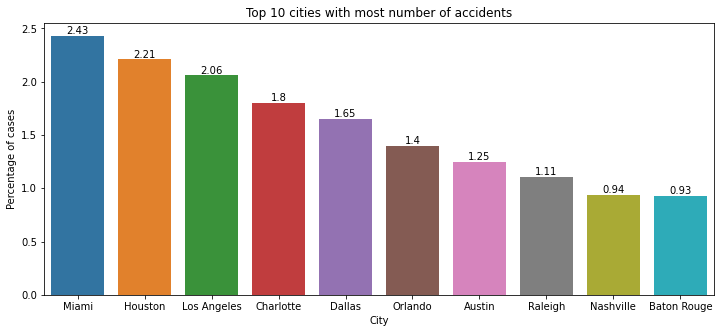

In [54]:
# Which are the top10 cities with most number of accidents.
plt.figure(figsize=(12,5))
top_10_cities = pd.DataFrame(city_df.head(10))

total = sum(city_df['cases'])
ax = sns.barplot(x=top_10_cities['city'], y=(round(top_10_cities['cases']/total*100,2)))

for i in ax.containers:
    ax.bar_label(i)

plt.title('Top 10 cities with most number of accidents')
plt.xlabel('City')
plt.ylabel('Percentage of cases')
plt.show()

### Insights

1. Miami is the city with highest(2.43%) number of road accidents between Feb,2016 - Dec,2020.
2. Houstan is the second highest(2.21%) city.
3. Around 15% of road accidents in US are only from these 10 cities.

In [96]:
top_10_city_df = main_df[main_df['City'].isin (list(top_10_cities.city))]
state_df = top_10_city_df[['State','City']]
state_df.groupby(['State'])
print(state_df.groupby(['State','City']).sum())

Empty DataFrame
Columns: []
Index: [(AR, Austin), (AR, Houston), (AR, Nashville), (AZ, Miami), (CA, Los Angeles), (CO, Austin), (FL, Miami), (FL, Orlando), (GA, Dallas), (GA, Nashville), (IL, Nashville), (IN, Austin), (LA, Baton Rouge), (MI, Charlotte), (MN, Austin), (MN, Houston), (NC, Charlotte), (NC, Dallas), (NC, Nashville), (NC, Raleigh), (NM, Miami), (NV, Austin), (OR, Dallas), (PA, Austin), (TN, Nashville), (TX, Austin), (TX, Dallas), (TX, Houston), (WV, Orlando)]


4. 3 out of top 10 cities with most no of accidents is from the state Arkansas.

In [97]:
# number of state by accidents.
state_df = pd.DataFrame(main_df['State'].value_counts()).reset_index().rename(columns={"index":"State","State":'cases'})
state_df

,State,cases
0,CA,113274
1,FL,56710
2,TX,37355
3,SC,24737
4,NY,22594
5,NC,21750
6,VA,19515
7,PA,19351
8,MN,12333
9,OR,11559


In [99]:
# dictionary to replace state code with name.
us_states = {'AK': 'Alaska','AL': 'Alabama','AR': 'Arkansas','AS': 'American Samoa','AZ': 'Arizona','CA': 'California',
             'CO': 'Colorado','CT': 'Connecticut','DC': 'District of Columbia','DE': 'Delaware','FL': 'Florida','GA': 'Georgia',
             'GU': 'Guam','HI': 'Hawaii','IA': 'Iowa','ID': 'Idaho','IL': 'Illinois','IN': 'Indiana','KS': 'Kansas','KY': 'Kentucky',
             'LA': 'Louisiana','MA': 'Massachusetts','MD': 'Maryland','ME': 'Maine','MI': 'Michigan','MN': 'Minnesota','MO': 'Missouri',
             'MP': 'Northern Mariana Islands','MS': 'Mississippi','MT': 'Montana','NC': 'North Carolina','ND': 'North Dakota',
             'NE': 'Nebraska','NH': 'New Hampshire','NJ': 'New Jersey','NM': 'New Mexico','NV': 'Nevada','NY': 'New York','OH': 'Ohio',
             'OK': 'Oklahoma','OR': 'Oregon','PA': 'Pennsylvania','PR': 'Puerto Rico','RI': 'Rhode Island','SC': 'South Carolina',
             'SD': 'South Dakota','TN': 'Tennessee','TX': 'Texas','UT': 'Utah','VA': 'Virginia','VI': 'Virgin Islands',
             'VT': 'Vermont','WA': 'Washington','WI': 'Wisconsin','WV': 'West Virginia','WY': 'Wyoming'}

def convert(x):
    return us_states[x]

state_df['State'] = state_df['State'].apply(convert)

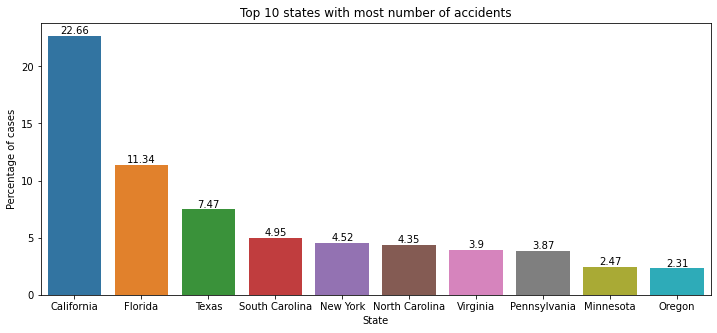

In [107]:
# top 10 states with most number of accidents.

plt.figure(figsize=(12,5))

top_10_states = state_df.head(10)


ax = sns.barplot(x=top_10_states['State'], y=(round(top_10_states['cases']/total*100,2)))

for i in ax.containers:
    ax.bar_label(i)

plt.title('Top 10 states with most number of accidents')
plt.xlabel('State')
plt.ylabel('Percentage of cases')
plt.show()


### Insights

1. In US California is the state with highest number of accidents.
2. About 23% of the total accidents records in US is from California.
3. Florida is the second highest.

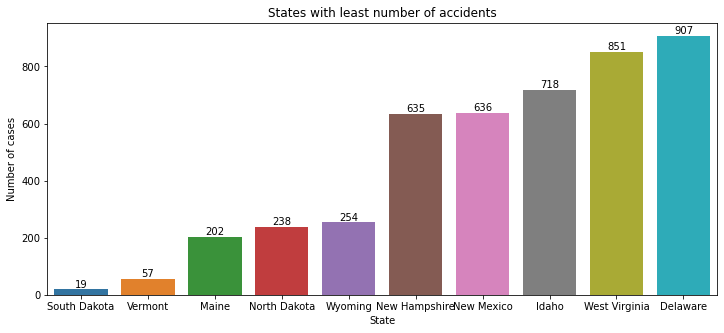

In [114]:
# states with least number of accidents.

plt.figure(figsize=(12,5))

least_10_states = state_df.tail(10)


ax = sns.barplot(x = 'State', y = 'cases', data = least_10_states, order = least_10_states.sort_values('cases').State)

for i in ax.containers:
    ax.bar_label(i)

plt.title('States with least number of accidents')
plt.xlabel('State')
plt.ylabel('Number of cases')
plt.show()


### Insights

1. South Dakota is the city with the least number of accidents in US.

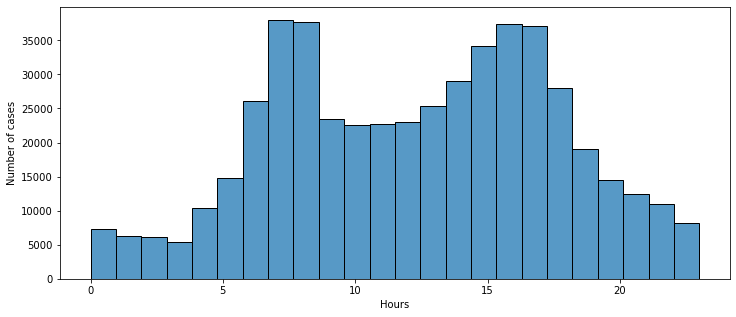

In [119]:
# accidents distribution based on hours.

plt.figure(figsize=(12,5))
sns.histplot(main_df.Start_Time.dt.hour, bins = 24)
plt.ylabel('Number of cases')
plt.xlabel('Hours')
plt.show()

### Insights

1. High number of accidents occur between 6am to 10am.--(maybe people are in hurry for work)
2. and then 3pm to 7pm

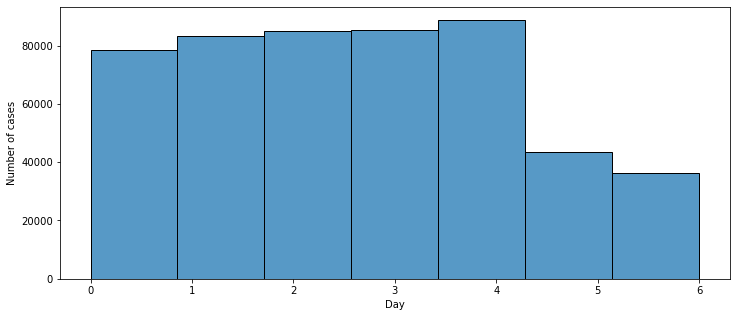

In [123]:
# accidents distribution based on day.
# monday = 0 & sunday = 6

plt.figure(figsize=(12,5))
sns.histplot(main_df.Start_Time.dt.dayofweek, bins = 7)
plt.ylabel('Number of cases')
plt.xlabel('Day')
plt.show()

### Insights

Higher number of accidents on weekdays compared to weekends.


In [151]:
main_df['Day_of_Week'] = main_df.Start_Time.dt.dayofweek
wknd_df = main_df.loc[(main_df['Day_of_Week'] == 5) | (main_df['Day_of_Week'] == 6)]
wkday_df = main_df.loc[(main_df['Day_of_Week'] != 5) & (main_df['Day_of_Week'] != 6)]

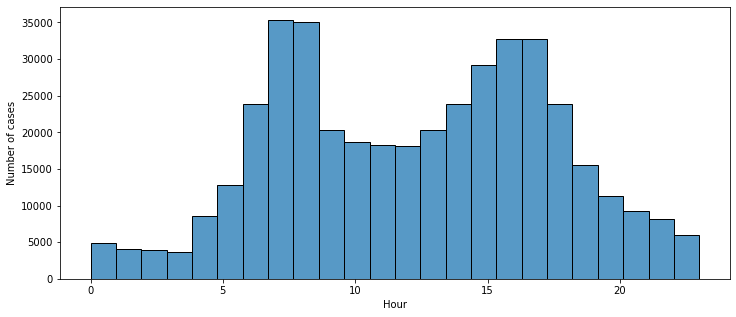

In [135]:
# distribution of accidents of weekday data.

plt.figure(figsize=(12,5))
sns.histplot(wkday_df.Start_Time.dt.hour, bins = 24)
plt.ylabel('Number of cases')
plt.xlabel('Hour')
plt.show()

### Insight

Peak hour between 6am to 10am and then 3pm to 7pm


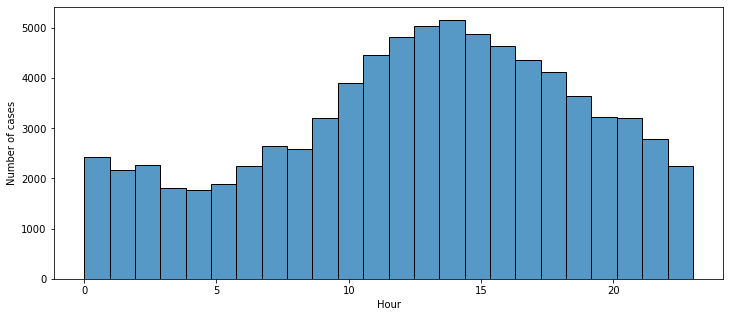

In [155]:
# distribution of accidents of weekend data.
plt.figure(figsize=(12,5))
sns.histplot(wknd_df.Start_Time.dt.hour, bins = 24)
plt.ylabel('Number of cases')
plt.xlabel('Hour')
plt.show()

### Insights

On weekends the peak hours is between 11am to 5pm unlike weekdays.

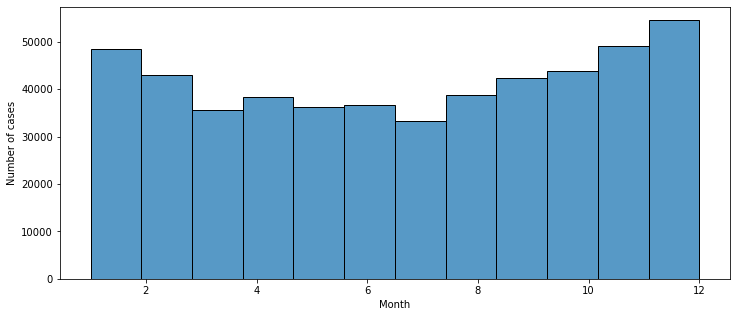

In [156]:
# distribution on month
plt.figure(figsize=(12,5))
sns.histplot(main_df.Start_Time.dt.month, bins = 12)
plt.ylabel('Number of cases')
plt.xlabel('Month')
plt.show()

### Insights

High number of accidents in winter months.

## Conclusion & Insights

1. Miami is the city that has contributed the highest number of road accidents in the US between February2016 and December2020.
2. Houston follows Miami as the second city with the highest number of road accidents.
3. California is the state with the highest number of accidents, accounting for about 23% of the total accidents recorded in the    US.
4. Florida is the second-highest contributing state in total number of accidents in the US.
5. South Dakota is the safest city with the least number of road accidents.
6. There are more accidents on weekdays compared to weekends, with the peak hour being between 6am to 10am and 3pm to 7pm. 
7. On weekends, the peak hour is 11am to 5pm. 
8. There are more accidents in the winter months.